In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [30]:
mcdonalds = pd.read_csv("mcdonalds.csv")

In [31]:
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [32]:
print(mcdonalds.shape)

(1453, 15)


In [33]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [34]:
MD_x = mcdonalds.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [35]:
# Perform PCA on the dataset
MD_pca = PCA()
MD_pca.fit(MD_x)

# Display the summary of the PCA results
print(MD_pca.get_covariance())

[[ 0.24739828  0.0365393   0.00126697 -0.01469601 -0.03772522  0.01593265
   0.02561623  0.16371893 -0.01472303  0.04909383 -0.08959046]
 [ 0.0365393   0.08377556  0.00243962  0.00358193 -0.01546103  0.02109343
   0.02151102  0.04016578 -0.02275761  0.01146862 -0.04231769]
 [ 0.00126697  0.00243962  0.08489702 -0.00408768  0.00784877  0.00177129
   0.00245763  0.00853369  0.00642444  0.01236209  0.00410427]
 [-0.01469601  0.00358193 -0.00408768  0.11526451  0.05414181  0.00464177
  -0.00443464 -0.01423719  0.01451163 -0.0458764   0.02127308]
 [-0.03772522 -0.01546103  0.00784877  0.05414181  0.24946961 -0.0087176
  -0.01794236 -0.03911922  0.03527659 -0.04211956  0.06897148]
 [ 0.01593265  0.02109343  0.00177129  0.00464177 -0.0087176   0.08989665
   0.03706637  0.02094128 -0.02899956  0.00402227 -0.01774992]
 [ 0.02561623  0.02151102  0.00245763 -0.00443464 -0.01794236  0.03706637
   0.24041169  0.0327545  -0.16966654  0.02545318 -0.02642059]
 [ 0.16371893  0.04016578  0.00853369 -0.0

In [36]:
# Print the PCA results with 1 decimal place
print(np.round(MD_pca.components_, 1))

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


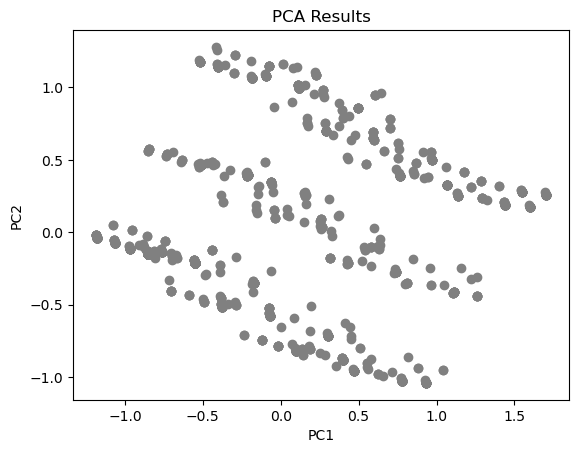

In [37]:
# Plot the PCA results
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c="grey")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results')
plt.show()

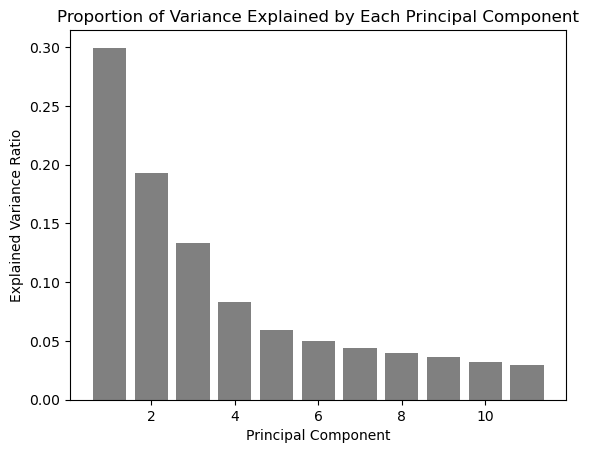

In [38]:
# Plot the projection axes for the PCA results
plt.bar(range(1, MD_pca.n_components_ + 1), MD_pca.explained_variance_ratio_, color='grey')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Proportion of Variance Explained by Each Principal Component')
plt.show()

In [39]:
np.random.seed(1234)
# Stepwise K-means clustering with 2 to 8 clusters and 10 repetitions
k_range = range(2, 9)
k_means_models = [KMeans(n_clusters=k, n_init=10).fit(MD_x) for k in k_range]

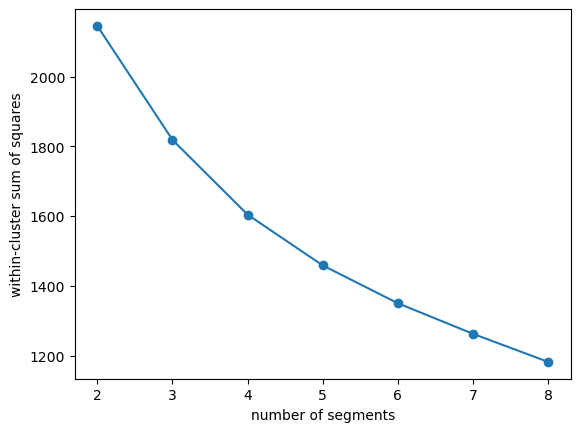

In [40]:
plt.plot(k_range, [model.inertia_ for model in k_means_models], marker='o')
plt.xlabel("number of segments")
plt.ylabel("within-cluster sum of squares")
plt.show()

In [51]:
def bootstrapped_kmeans(data, k, nboot):
    cluster_labels = KMeans(n_clusters=k, n_init=10).fit(data).labels_
    bootstrap_indices = np.random.randint(0, len(data), size=(nboot, len(data)))
    bootstrap_clusters = [cluster_labels[indices] for indices in bootstrap_indices]
    return bootstrap_clusters

nboot = 100
MD_b28 = [bootstrapped_kmeans(MD_x, k, nboot) for k in k_range]

In [52]:
adjusted_rand_indices = [[np.mean([adjusted_rand_score(labels, bootstrap_labels)
                                   for bootstrap_labels in bootstrap_clusters])
                          for bootstrap_clusters in MD_b28_k]
                         for labels, MD_b28_k in zip(k_means_models, MD_b28)]

TypeError: len() of unsized object

In [50]:
print(type(MD_x))

<class 'numpy.ndarray'>
